## Tennis Project
### Question 17

In [55]:
import pandas as pd
from pathlib import Path


In [56]:
root_path = Path("../data")

In [57]:
stat_files = list(root_path.rglob("statistics*.parquet"))[:30]


df_list = []
for file in stat_files:
    df_list.append(pd.read_parquet(file))

df_stats = pd.concat(df_list, ignore_index=True)
print(f"Loaded {len(stat_files)} statistics files with total rows: {len(df_stats)}")

Loaded 30 statistics files with total rows: 1832


In [58]:
print(df_stats.columns)

Index(['match_id', 'period', 'statistic_category_name', 'statistic_name',
       'home_stat', 'away_stat', 'compare_code', 'statistic_type',
       'value_type', 'home_value', 'away_value', 'home_total', 'away_total'],
      dtype='object')


In [66]:


df_stats.columns = [col.strip() for col in df_stats.columns]



possible_break_names = ['Breaks', 'Break Points', 'Break Points Won', 'Break of Serve']

break_df = df_stats[df_stats['statistic_name'].isin(possible_break_names)]


if break_df.empty:
    print("No direct 'Break' statistic found. Here are all unique statistic names:")
    print(df_stats['statistic_name'].unique())
else:
  
    break_df['total_breaks'] = break_df['home_stat'] + break_df['away_stat']

  
    avg_breaks = break_df['total_breaks'].mean()

    print(f"Average number of break of serve per match: {avg_breaks:.2f}")


from pathlib import Path
import pandas as pd

root_path = Path("../data")


stat_files = list(root_path.rglob("statistics*.parquet"))[:30]

df_list = []
for file in stat_files:
    df_list.append(pd.read_parquet(file))

df_stats = pd.concat(df_list, ignore_index=True)
print(f"Loaded {len(stat_files)} statistics files with total rows: {len(df_stats)}")


possible_break_names = ['Breaks', 'Break Points', 'Break Points Won', 'Break of Serve']

break_df = df_stats[df_stats['statistic_name'].isin(possible_break_names)]

if break_df.empty:
    print("No direct 'Break' statistic found. Here are all unique statistic_name values:")
    print(df_stats['statistic_name'].unique())
else:
   
    break_df['total_breaks'] = break_df['home_stat'] + break_df['away_stat']

   
    avg_breaks = break_df['total_breaks'].mean()

    print(f"Average number of break of serve per match: {avg_breaks:.2f}")


No direct 'Break' statistic found. Here are all unique statistic names:
['aces' 'double_faults' 'first_serve' 'second_serve' 'first_serve_points'
 'second_serve_points' 'service_games_played' 'break_points_saved' 'total'
 'service_points_won' 'receiver_points_won' 'max_points_in_a_row'
 'total_won' 'service_games_won' 'max_games_in_a_row'
 'first_serve_return_points' 'second_serve_return_points'
 'return_games_played' 'break_points_converted' 'tiebreaks']
Loaded 30 statistics files with total rows: 1832
No direct 'Break' statistic found. Here are all unique statistic_name values:
['aces' 'double_faults' 'first_serve' 'second_serve' 'first_serve_points'
 'second_serve_points' 'service_games_played' 'break_points_saved' 'total'
 'service_points_won' 'receiver_points_won' 'max_points_in_a_row'
 'total_won' 'service_games_won' 'max_games_in_a_row'
 'first_serve_return_points' 'second_serve_return_points'
 'return_games_played' 'break_points_converted' 'tiebreaks']


In [67]:
break_df = df_stats[df_stats['statistic_name'] == 'break_points_converted']

In [68]:
break_df['total_breaks'] = break_df['home_stat'] + break_df['away_stat']

C:\Users\mbahr\AppData\Local\Temp\ipykernel_9240\3779129473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  break_df['total_breaks'] = break_df['home_stat'] + break_df['away_stat']


In [70]:
break_df['home_stat'] = pd.to_numeric(break_df['home_stat'], errors='coerce')
break_df['away_stat'] = pd.to_numeric(break_df['away_stat'], errors='coerce')

C:\Users\mbahr\AppData\Local\Temp\ipykernel_9240\2481188871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  break_df['home_stat'] = pd.to_numeric(break_df['home_stat'], errors='coerce')
C:\Users\mbahr\AppData\Local\Temp\ipykernel_9240\2481188871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  break_df['away_stat'] = pd.to_numeric(break_df['away_stat'], errors='coerce')


In [71]:
break_df = break_df.dropna(subset=['home_stat', 'away_stat'])

In [72]:
break_df['total_breaks'] = break_df['home_stat'] + break_df['away_stat']
avg_breaks = break_df['total_breaks'].mean()
print(f" Average number of break of serve per match: {avg_breaks:.2f}")

 Average number of break of serve per match: 3.73


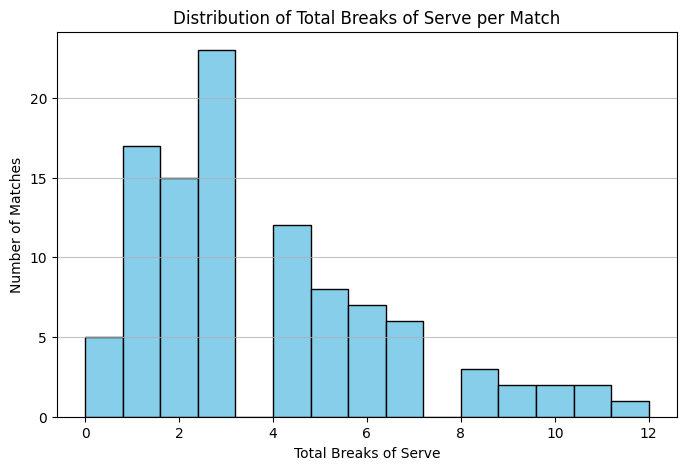

In [73]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8,5))
plt.hist(break_df['total_breaks'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Breaks of Serve per Match')
plt.xlabel('Total Breaks of Serve')
plt.ylabel('Number of Matches')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Result:Summary of Break of Serve Analysis
- The average number of break of serve per match is approximately 3.73.
- The distribution shows that most matches have between 2 to 5 breaks of serve.